In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Company_Data file

In [2]:
df = pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.isna().sum()/len(df)*100

Sales          0.0
CompPrice      0.0
Income         0.0
Advertising    0.0
Population     0.0
Price          0.0
ShelveLoc      0.0
Age            0.0
Education      0.0
Urban          0.0
US             0.0
dtype: float64

In [6]:
df.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.5,138,73,11,276,120,Bad,42,17,Yes,Yes


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['ShelveLoc'] = le.fit_transform(df['ShelveLoc'])
df['Urban'] = le.fit_transform(df['Urban'])
df['US'] = le.fit_transform(df['US'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


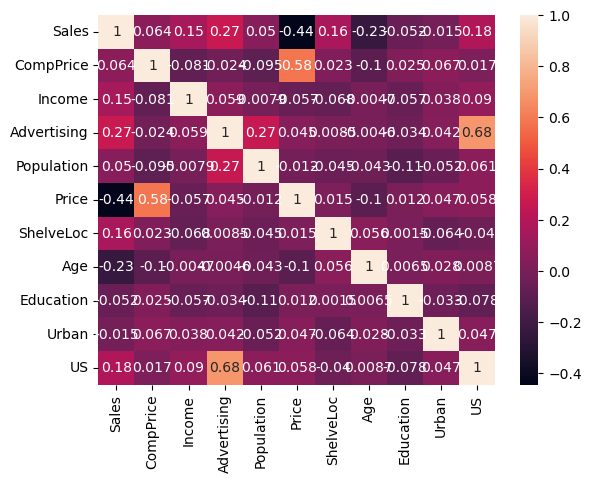

In [8]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [9]:
#Independent feature and dependent feature

x = df.drop('Sales', axis = 1)
y = df['Sales']

In [10]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [11]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [12]:
y.value_counts()

Sales
7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: count, Length: 336, dtype: int64

In [13]:
#Splitting the model into training and testing part

from sklearn.model_selection import train_test_split 

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [14]:
#Decision Tree using Entropy Method

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth = 3) 
model.fit(xtrain,ytrain)
model.predict(xtest)

array([ 4.57860465,  6.95056604,  6.95056604,  4.57860465,  4.57860465,
        6.95056604,  6.95056604,  9.75701754,  6.95056604,  6.95056604,
        6.95056604, 12.36461538,  6.95056604,  6.95056604,  6.95056604,
        6.95056604,  6.95056604,  9.75701754, 10.09882353,  4.57860465,
        6.95056604,  9.75701754,  6.95056604,  6.95056604,  4.57860465,
        9.75701754,  6.95056604,  9.75701754, 10.09882353,  9.75701754,
        6.95056604,  6.293     ,  6.95056604,  6.95056604,  6.95056604,
        6.95056604,  6.293     ,  6.95056604,  9.75701754,  9.75701754,
        6.95056604,  4.57860465,  4.57860465,  4.57860465, 10.09882353,
        6.95056604,  6.95056604,  6.95056604,  6.95056604,  6.95056604,
        9.75701754,  6.95056604,  7.6575    ,  6.95056604,  9.75701754,
        6.95056604,  6.95056604,  6.95056604, 12.36461538,  6.95056604,
        9.75701754,  4.57860465,  6.95056604,  6.95056604,  4.57860465,
       10.04333333,  7.6575    ,  6.95056604,  9.75701754,  6.29

In [15]:
ypred = model.predict(xtest)

In [16]:
#Training Accuracy

model.score(xtrain,ytrain) 

0.4768910450911885

In [17]:
#Testing Accuracy

model.score(xtest,ypred)

1.0

In [18]:
from sklearn.metrics import r2_score

r2_score(ytest,ypred)

0.34695892490517477

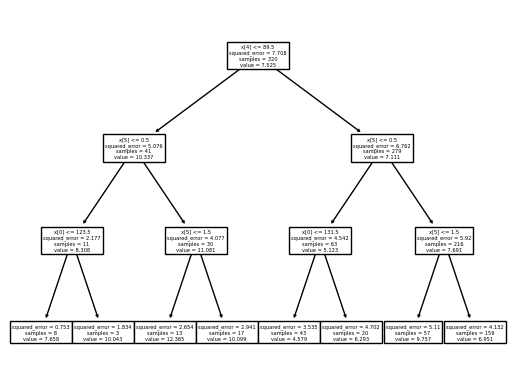

In [19]:
#Decision Tree Visualization

from sklearn import tree

tree.plot_tree(model)
plt.show()

#Maximum depth is 3 as we given

In [20]:
#Important features in our data

model.feature_importances_

array([0.0446644, 0.       , 0.       , 0.       , 0.3161727, 0.6391629,
       0.       , 0.       , 0.       , 0.       ])

# Fraud_Check file

In [21]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [23]:
df.isna().sum()/len(df)*100

Undergrad          0.0
Marital.Status     0.0
Taxable.Income     0.0
City.Population    0.0
Work.Experience    0.0
Urban              0.0
dtype: float64

In [24]:
df.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES


In [25]:
print(df['Undergrad'].value_counts())
print(df['Marital.Status'].value_counts())
print(df['Urban'].value_counts())

Undergrad
YES    312
NO     288
Name: count, dtype: int64
Marital.Status
Single      217
Married     194
Divorced    189
Name: count, dtype: int64
Urban
YES    302
NO     298
Name: count, dtype: int64


In [26]:
df['Undergrad']= le.fit_transform(df['Undergrad'])
df['Urban']= le.fit_transform(df['Urban'])
df['Marital.Status']= le.fit_transform(df['Marital.Status'])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


C:\Users\samad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


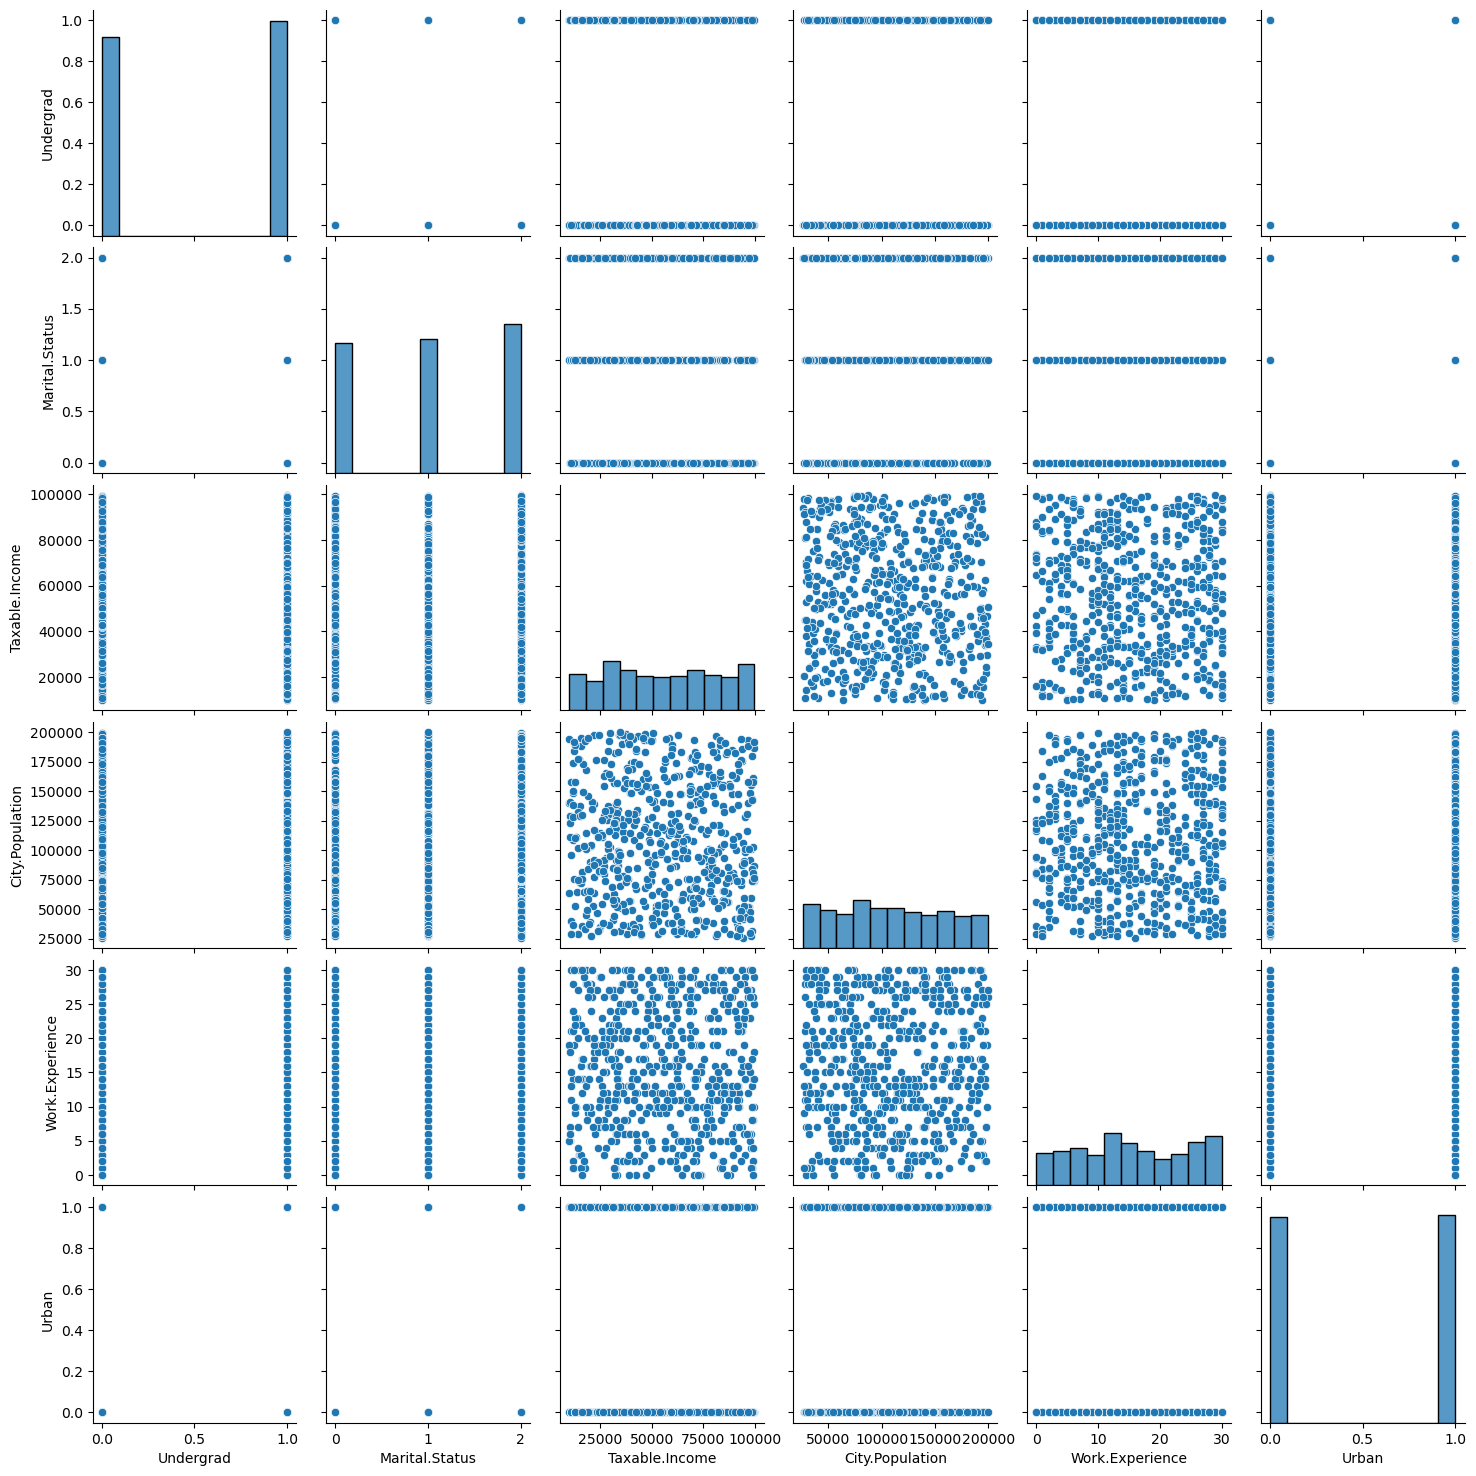

In [27]:
sns.pairplot(df)
plt.show()

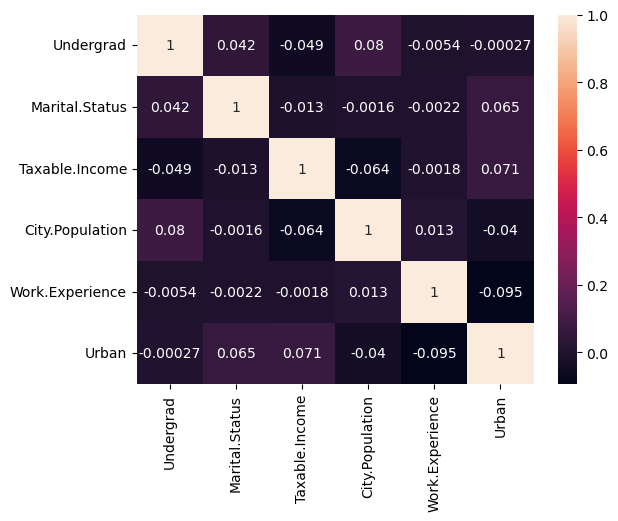

In [28]:
sns.heatmap(df.corr(), annot = True)
plt.show()

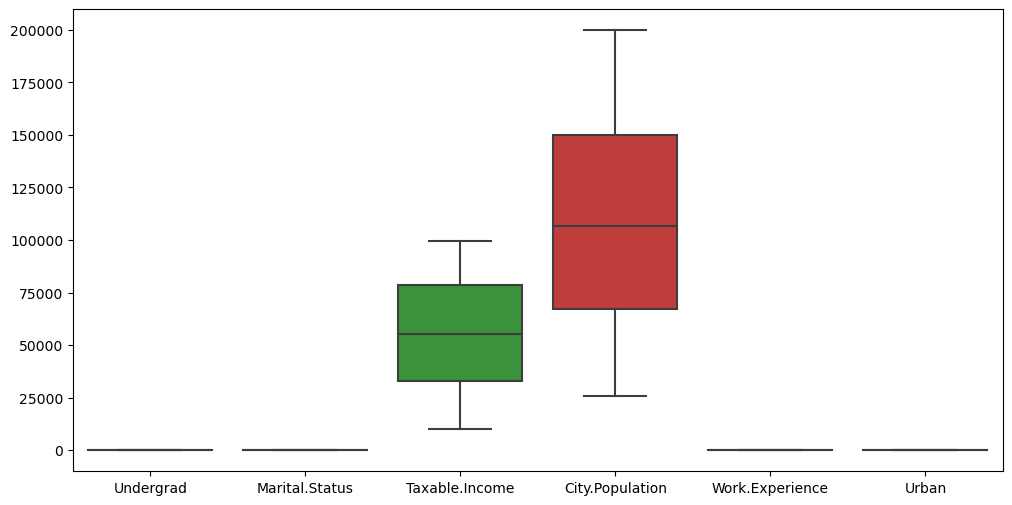

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.show()

In [30]:
x = df.drop('Taxable.Income', axis = 1)
y = df['Taxable.Income']

In [31]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [32]:
y

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [33]:
#Splitting the data into Training and Testing

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=40)     

In [34]:
#Decision Tree using Entropy method

model = DecisionTreeRegressor(max_depth = 3)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

In [35]:
ypred

array([57126.78106509, 63696.93548387, 63696.93548387, 56466.20945946,
       41321.6779661 , 63696.93548387, 63696.93548387, 41321.6779661 ,
       57126.78106509, 57126.78106509, 56466.20945946, 57126.78106509,
       40219.30769231, 57126.78106509, 56466.20945946, 56466.20945946,
       56466.20945946, 40219.30769231, 41321.6779661 , 57126.78106509,
       41321.6779661 , 57126.78106509, 57126.78106509, 52525.96296296,
       52525.96296296, 52525.96296296, 63696.93548387, 63696.93548387,
       63696.93548387, 63696.93548387, 56466.20945946, 57126.78106509,
       56466.20945946, 41321.6779661 , 56466.20945946, 57126.78106509,
       57126.78106509, 57126.78106509, 56466.20945946, 56466.20945946,
       57126.78106509, 63696.93548387, 57126.78106509, 56466.20945946,
       56466.20945946, 56466.20945946, 56466.20945946, 57126.78106509,
       56466.20945946, 56466.20945946, 52525.96296296, 56466.20945946,
       52525.96296296, 41321.6779661 , 52525.96296296, 57126.78106509,
      

In [36]:
model.score(xtrain,ytrain)

0.06860002252397757

In [37]:
model.score(xtest,ypred)

1.0

In [38]:
#R2 Score

print('R2 Score :', r2_score(ytest,ypred))

R2 Score : 0.0008266654554349717


In [39]:
print(np.round(r2_score(ytest,ypred),5))

0.00083


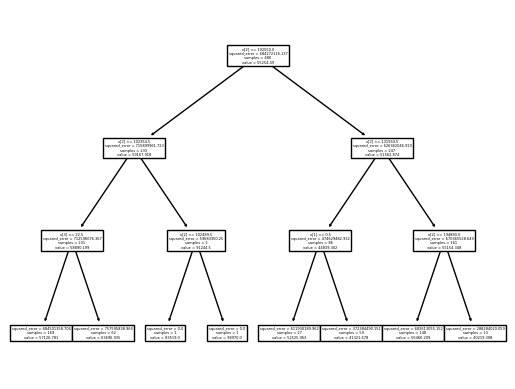

<Figure size 1200x600 with 0 Axes>

In [40]:
#DT Visualization

from sklearn import tree

tree.plot_tree(model)
plt.figure(figsize = (12,6))
plt.show()

In [41]:
x.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

In [42]:
model.feature_importances_

array([0.        , 0.10320275, 0.80989656, 0.08690069, 0.        ])